# <center>Programming For Data Analytics Project 1</center>
### Title: Simulating a data set of a real-world phenomenon - the factors contributing to heart disease in humans
---

The variables in the dataset are known factors that increase the likelyhood of developing cardiovascular disease. For example, a person who doesn't smoke or drink alcohol, but lives a sedentary lifestyle and is aged over 65 is at increased risk. What about those who drink alcohol and or smoke who are also physically active? But what about those who lead active lifestyles in term of physical exercise, yet smoke and or drink alcohol? Are they more likely to contract cardiovascular disease?

Creating randomly generated numpy dataframes, specifying a mean, standard deviation and sample size:

In [1]:
import numpy as np
import pandas as pd
# 'numpy.random.normal' takes in 2 parameters, mean, standard deviation and size. Each time it is run, it will create a randomly generated numpy dataframe.
agesInDays = np.random.normal(19600.25, 2441.4, 300)
# 'random.binomial' is used to output a binary dataframe containing only ones and zeros:
gender = np.random.binomial(1.393333, 0.489306, 300)
height = np.random.normal(164.216667, 9.880374, 300)
weight = np.random.normal(73.123333, 14.157551, 300)
systolic_bp = np.random.normal(127.793333, 16.862932, 300)
diastolic_bp =np.random.normal(81.8, 9.768217, 300)
# 'numpy.random.choice' allows the user to output values from a tuple weighted on the probabilities of each element occuring, where the size of the output dataframe is also specified in the input:
cholestrol = np.random.choice((1,2,3), 300, p=[218/300, 48/300, 34/300])
glucose = np.random.choice((1,2,3), 300, p=[264/300, 23/300, 13/300])
smoke = np.random.choice((0,1), 300, p=[0.893333, 0.106667])
alcohol = np.random.choice((0,1), 300, p=[0.96, 0.04])
#print(alcohol)
physicallyActive = np.random.choice((0,1), 300, p=[0.233333, 0.766667])
#print(physicallyActive)
heart_disease = np.random.choice((0,1), 300, p=[0.466667 , 0.533333])
#ptint(heart_disease)

In [2]:
df1 = pd.DataFrame({"agesInDays": np.random.normal(19600.25, 2441.4, 900),
                    "gender": np.random.binomial(1.393333, 0.489306, 900),
                    "height": np.random.normal(164.216667, 9.880374, 900),
                    "weight": np.random.normal(73.123333, 14.157551, 900),
                    "systolic_bp": np.random.normal(127.793333, 16.862932, 900),
                    "diastolic_bp": np.random.normal(81.8, 9.768217, 900),
                    "cholestrol": np.random.choice((1,2,3), 900, p=[218/300, 48/300, 34/300]),
                    "glucose": np.random.choice((1,2,3), 900, p=[264/300, 23/300, 13/300]),
                    "smoke": np.random.choice((0,1), 900, p=[0.893333, 0.106667]),
                    "alcohol": np.random.choice((0,1), 900, p=[0.96, 0.04]),
                    "phys_active": np.random.choice((0,1), 900, p=[0.233333, 0.766667]),
                    "heart_disease": np.random.choice((0,1), 900, p=[0.466667 , 0.533333])})
df1

agesInDays  gender      height     weight  systolic_bp  diastolic_bp  \
0    18828.835116       0  181.569131  50.419606   133.039777     95.058260   
1    20332.397097       0  156.347907  65.809808   139.408679     75.884570   
2    19537.480596       1  163.036078  92.281589   131.143528     72.056656   
3    18981.211324       1  165.721102  80.212983   132.599998     66.841408   
4    20473.308696       1  163.248752  60.644707   116.311620     78.518098   
..            ...     ...         ...        ...          ...           ...   
895  22004.155015       1  149.735569  92.010644   123.893469     90.923326   
896  20588.905323       0  177.275660  66.092927   118.035084     73.463680   
897  19574.351355       0  156.989587  72.109650   140.044140     78.122924   
898  21481.262102       0  165.387787  70.585440   111.793249     92.647176   
899  23737.070579       0  178.465636  79.975210   126.508858     88.076095   

     cholestrol  glucose  smoke  alcohol  phys_active  heart_disease  
0             2        1      0        0            1              1  
1             1        1      0        0            0              0  
2             3        1      0        0            1              0  
3             2        1      0        0            1              1  
4             1        1      0        0            0              1  
..          ...      ...    ...      ...          ...            ...  
895           3        1      0        0            1              1  
896           1        1      0        0            1              1  
897           1        1      1        0            1              0  
898           1        1      0        0            1              1  
899           1        1      0        0            1              0  

[900 rows x 12 columns]

In [3]:
# Formatting can be applied to reduce the number of digits after the decimal point:
df1.style.format("{:.2f}")

Styling applied to highlight above normal levels of cholestrol and glucose, and also those who smoke or drink alcohol:

In [4]:
df1.style.background_gradient(cmap='YlOrRd', subset=["cholestrol", "glucose", "smoke", "alcohol"])

If variables are linearly related, it may be useful to get the covariance. Covariance can be used to characterize the relationships between 2 or more variables. 

The Covariance leads to the Pearson correlation coefficient, another measure of the linear relationship between 2 variables. It outputs a value between and including -1 and 1, where -1 means a perfectly negative linear relationship, 0 means there is no linear relationship and 1 means a perfectly positive linear relationship. So the further the ouput is from 0, the variables are more closely related.

In [5]:
# The 'corrcoef' method outputs a matrix of correlation coefficients:
x = np.corrcoef(agesInDays, heart_disease)
print(x)
x2 = np.corrcoef(weight, heart_disease)
print(x2)
x3 = np.corrcoef(systolic_bp, heart_disease)
print(x3)

[[ 1.         -0.00400783]
 [-0.00400783  1.        ]]
[[ 1.        -0.0187484]
 [-0.0187484  1.       ]]
[[ 1.         -0.05827159]
 [-0.05827159  1.        ]]


Statistical significance can be determined by finding the p-value using the 'pearsonr' method contained in the scipy.stats package.

In [6]:
# Calculating the Pearson correlation coefficient and the p-value
from scipy.stats import pearsonr
pearsonr(agesInDays, heart_disease)

PearsonRResult(statistic=-0.004007827855044008, pvalue=0.9448876571024699)

In [7]:
pearsonr(height, heart_disease)

PearsonRResult(statistic=0.08590899936755979, pvalue=0.1376706482064672)

In [8]:
pearsonr(weight, heart_disease)

PearsonRResult(statistic=-0.01874839620266129, pvalue=0.7463889016861889)

In [9]:
pearsonr(systolic_bp, heart_disease)

PearsonRResult(statistic=-0.05827159048523718, pvalue=0.31444679280015614)

In [10]:
pearsonr(diastolic_bp, heart_disease)

PearsonRResult(statistic=-0.007790706093411831, pvalue=0.8931039142842612)

In [11]:
pearsonr(cholestrol, heart_disease)

PearsonRResult(statistic=-0.08484023984196873, pvalue=0.14265216667326575)

In [15]:
pearsonr(glucose, heart_disease)

PearsonRResult(statistic=0.06861565773342876, pvalue=0.2360595243470284)

In [12]:
pearsonr(alcohol, heart_disease)

PearsonRResult(statistic=0.05707159582095107, pvalue=0.3245329401414606)

In [13]:
pearsonr(physicallyActive, heart_disease)

PearsonRResult(statistic=-0.11102580405551973, pvalue=0.0547395070461011)

A p-value, also known as the probability value, higher that 0.05 is not considered statistically significant. The Null Hypothesis cannot be rejected for p-values greater than 0.05. The Null Hypothesis means there is no relationship bewteen the variables. A Pearson coefficient of around zero suggests there is no correlation. The Pearson coefficient measures the linear relationship, it can have values between -1 and 1, where -1 is an exactly negative linear relationship and 1 is an exactly positive linear relationship. 

In [16]:
# The relationship between 2 or more variables can also be calcuted using the '.corr()' method:
print(df1.corr())

               agesInDays    gender    height    weight  systolic_bp  \
agesInDays       1.000000  0.026279 -0.013715  0.023317     0.051850   
gender           0.026279  1.000000 -0.010353  0.004869     0.013426   
height          -0.013715 -0.010353  1.000000  0.019475    -0.001422   
weight           0.023317  0.004869  0.019475  1.000000     0.016198   
systolic_bp      0.051850  0.013426 -0.001422  0.016198     1.000000   
diastolic_bp    -0.018425 -0.014338 -0.010173 -0.026392     0.043168   
cholestrol       0.009833  0.023326  0.043782  0.037413     0.022317   
glucose         -0.021484  0.026465 -0.016989  0.014901     0.006764   
smoke            0.006087 -0.060837  0.012980 -0.040761     0.018467   
alcohol          0.005236  0.003994  0.041163 -0.027267     0.025819   
phys_active      0.006015  0.021776 -0.031035  0.019819    -0.024826   
heart_disease    0.005732  0.014849  0.047207  0.047890     0.001082   

               diastolic_bp  cholestrol   glucose     smoke   a

The above is a tabular two-dimensional style output of the correlations between all the variables in the dataset. The '1.000000' values can be ignored as those values are for a variable measured against the same variable which is a perfect one-to-one relationship as expected. The other results are around zero indicating very little correlation. 

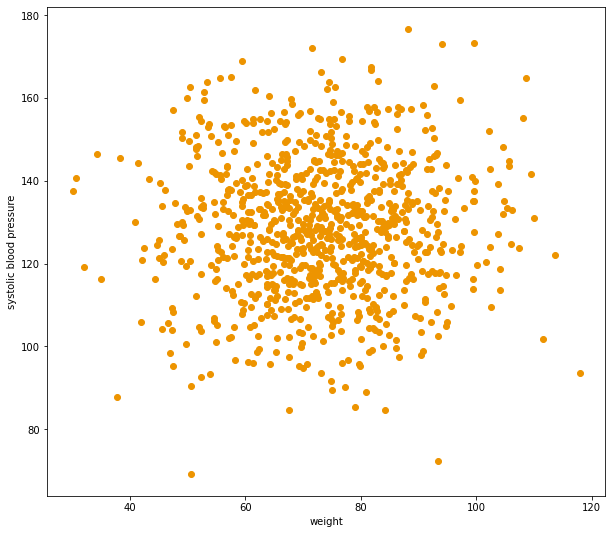

In [34]:
# A scatterplot comparing weight to the systolic blood pressure:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 9))
plt.xlabel("weight")
plt.ylabel("systolic blood pressure")
ax.scatter(df1['weight'], df1['systolic_bp'], c='#ed9400');

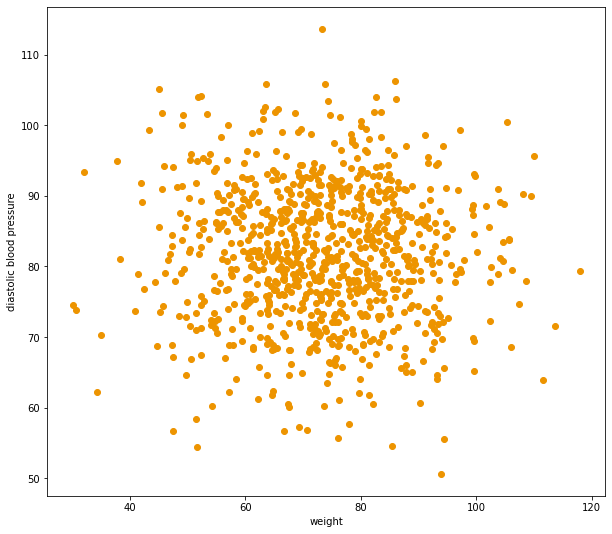

In [33]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.xlabel("weight")
plt.ylabel("diastolic blood pressure")
ax.scatter(df1['weight'], df1['diastolic_bp'], c='#ed9400');

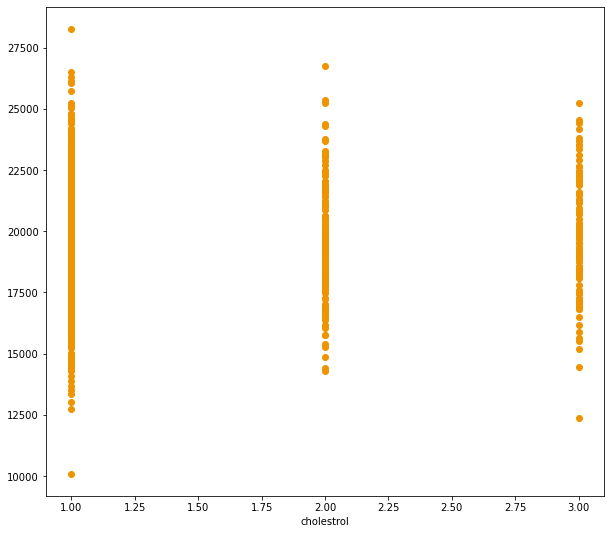

In [32]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.xlabel("cholestrol")
ax.scatter(df1['cholestrol'], df1['agesInDays'], c='#ed9400');

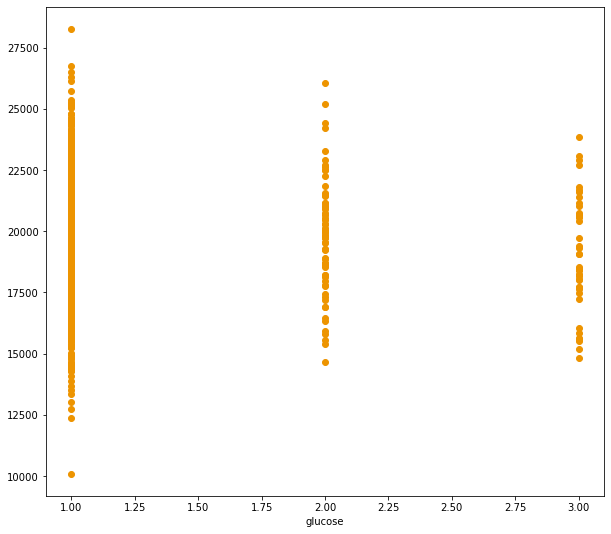

In [31]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.xlabel("glucose")
ax.scatter(df1['glucose'], df1['agesInDays'], c='#ed9400');

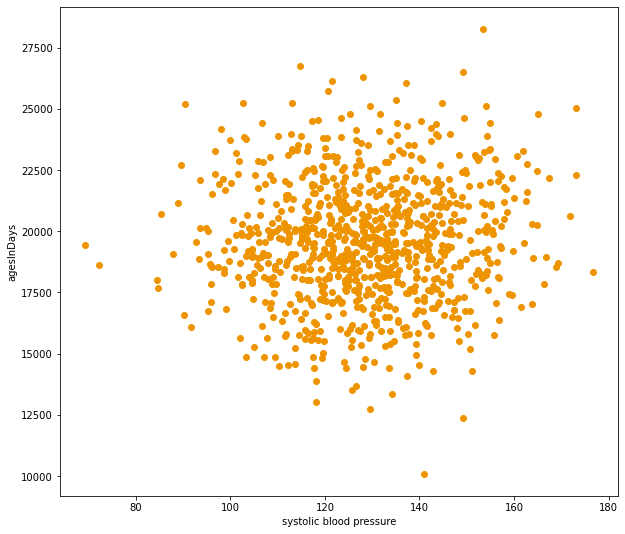

In [30]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.xlabel("systolic blood pressure")
plt.ylabel("agesInDays")
ax.scatter(df1['systolic_bp'], df1['agesInDays'], c='#ed9400');

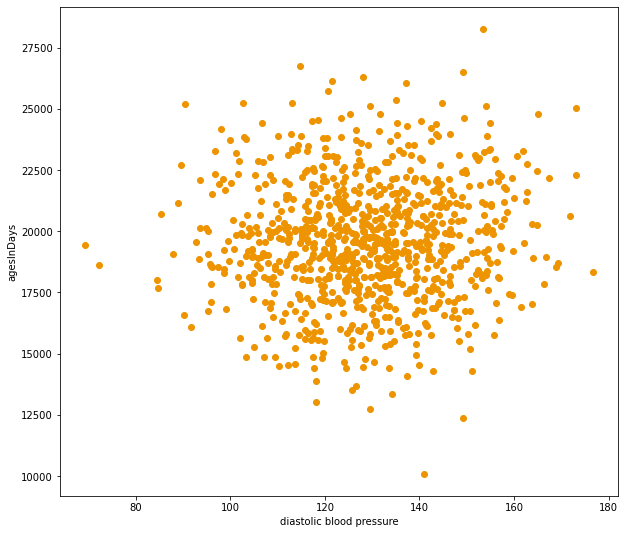

In [29]:
fig, ax = plt.subplots(figsize=(10, 9))
plt.xlabel("diastolic blood pressure")
plt.ylabel("agesInDays")
ax.scatter(df1['systolic_bp'], df1['agesInDays'], c='#ed9400');

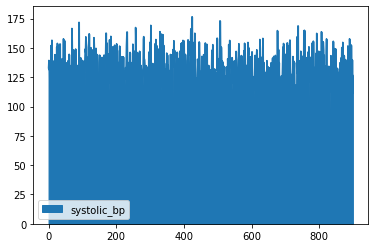

In [28]:
df1.plot.area(y="systolic_bp");

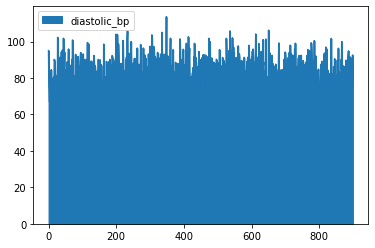

In [27]:
df1.plot.area(y="diastolic_bp");

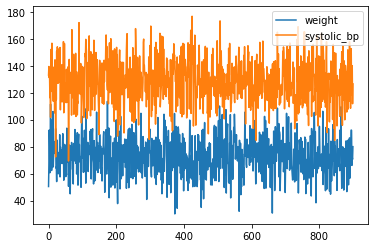

In [26]:
df1.plot.line(y=["weight", "systolic_bp"]);

In [35]:
df1.loc[(df1['glucose'] == 3) & (df1['heart_disease'] == 1)]

agesInDays  gender      height      weight  systolic_bp  diastolic_bp  \
84   18234.474631       0  169.194399   79.737199   131.997825     83.545008   
112  15199.743870       1  184.132524   77.505821   150.706289     72.766353   
144  21032.686337       1  174.188275   81.324978   144.439115     78.288243   
156  19089.416881       1  158.692337   64.477456   129.428711     86.998947   
233  19733.194582       0  146.599430   73.745158   131.106342    105.846191   
260  14819.823026       0  147.379339   79.776332   119.307813     90.438729   
296  21701.240349       1  167.234333   74.263560   146.495096     84.082965   
336  19376.117760       1  163.504933   70.362787   127.782759     84.331486   
363  18451.120625       1  169.162000   81.365349    98.674401     86.893726   
372  16028.559224       0  184.082286  104.563422   148.025442     83.438341   
423  20437.539033       1  156.628942   55.981415   146.569520     81.003099   
436  17635.664414       0  182.204075   72.533708   124.188433     88.942983   
450  21614.706760       1  166.918948   70.946785   129.321073     77.544235   
515  20734.138851       0  163.387637   82.238056   137.544272     85.121793   
526  20562.098834       1  159.148064   78.359786   128.763770     93.959644   
537  22911.936361       0  156.884525  103.699458   127.240330     91.018892   
562  20645.159643       1  173.038119   66.905156   153.689030     86.489057   
608  18161.540055       1  173.738847   72.350065   122.807352     87.665694   
697  18041.937118       1  163.378215   74.999827   108.029108     80.805842   
737  18556.183968       0  161.984948   59.468387   168.875176     85.435896   
747  15589.211819       1  178.329559   68.500780   115.826958     77.342847   
788  21404.067535       1  147.794825   91.189056   122.690106     70.515809   

     cholestrol  glucose  smoke  alcohol  phys_active  heart_disease  
84            1        3      0        0            0              1  
112           3        3      0        0            1              1  
144           1        3      0        0            0              1  
156           1        3      0        0            1              1  
233           1        3      0        0            1              1  
260           1        3      0        0            1              1  
296           1        3      0        1            1              1  
336           1        3      1        0            1              1  
363           1        3      0        0            1              1  
372           2        3      0        0            1              1  
423           1        3      0        0            1              1  
436           1        3      0        0            1              1  
450           2        3      0        0            0              1  
515           1        3      0        0            1              1  
526           1        3      0        0            1              1  
537           1        3      0        0            1              1  
562           1        3      0        0            1              1  
608           1        3      0        0            1              1  
697           1        3      0        0            1              1  
737           1        3      0        0            1              1  
747           1        3      0        0            1              1  
788           2        3      0        0            1              1

18 occurances where the patient had glucose level 3 (well above normal) and heart disease. 42 occurances where the patient had glucose level 2 (above normal) and heart disease. Conversely 17 had glucose level 3, 37 had glucose level 2 and did not have heart disease.

Comparing glucose level 3 (well above normal) with incidences of heart disease:

In [36]:
df1["glucose"].loc[(df1['glucose'] == 3) & (df1['heart_disease'] == 1)].count()

22

In [37]:
df1["glucose"].loc[(df1['glucose'] == 3) & (df1['heart_disease'] == 0)].count()

19

Comparing glucose level 2 (above normal) with incidences of heart disease:

In [39]:
df1["glucose"].loc[(df1['glucose'] == 2) & (df1['heart_disease'] == 1)].count()

32

In [40]:
df1['glucose'].loc[(df1['glucose'] == 2) & (df1['heart_disease'] == 0)].count()

33

Comparing glucose level 1 (normal) with incidences of heart disease:

In [41]:
# Normal glucose level and has heart disease:
df1['glucose'].loc[(df1['glucose'] == 1) & (df1['heart_disease'] == 1)].count()

426

In [42]:
# Normal glucose level and doesn't have heart disease:
df1['glucose'].loc[(df1['glucose'] == 1) & (df1['heart_disease'] == 0)].count()

368

In [43]:
df1.loc[(df1['smoke'] == 1) & (df1['heart_disease'] == 1)]

agesInDays  gender      height      weight  systolic_bp  diastolic_bp  \
92   17630.878258       0  169.491159   68.969742   137.951342     81.364624   
107  19113.218761       0  157.690029   67.659328   136.301655     89.197297   
111  21129.791011       0  151.258628  108.106816   155.200204     90.193030   
116  21224.458946       1  163.745062   83.159239   106.512498     78.297338   
147  16403.530721       0  169.138284   71.300392   115.007380     90.228921   
..            ...     ...         ...         ...          ...           ...   
801  19357.463225       1  168.464662   83.605893   117.412397     70.164213   
812  17270.375627       1  161.986213   81.137762   148.172919     83.892168   
834  23965.112979       1  181.367390   84.024808   143.477398     85.285080   
843  22080.551704       0  163.981334  117.928805    93.487685     79.352917   
855  22468.882641       0  157.492414   76.345359   117.722067     74.767591   

     cholestrol  glucose  smoke  alcohol  phys_active  heart_disease  
92            1        1      1        0            0              1  
107           1        1      1        0            1              1  
111           1        1      1        0            1              1  
116           1        1      1        0            0              1  
147           1        1      1        0            0              1  
..          ...      ...    ...      ...          ...            ...  
801           2        1      1        0            1              1  
812           3        1      1        0            1              1  
834           1        1      1        0            1              1  
843           1        1      1        0            1              1  
855           1        1      1        0            1              1  

[64 rows x 12 columns]

Due to the relatively small number of smokers among the patients, the rates of heart disease among smokers isn't conclusive:

In [44]:
df1['smoke'].loc[(df1['smoke'] == 1) & (df1['heart_disease'] == 0)].count()

51

In [45]:
df1['smoke'].loc[(df1['smoke'] == 1) & (df1['heart_disease'] == 1)].count()

64

In [46]:
df1['smoke'].loc[(df1['smoke'] == 0) & (df1['heart_disease'] == 0)].count()

369

In [47]:
df1['smoke'].loc[(df1['smoke'] == 0) & (df1['heart_disease'] == 1)].count()

416

In [48]:
df1.loc[(df1['smoke'] == 1) & (df1['alcohol'] == 1) & (df1['heart_disease'] == 1)]

agesInDays  gender      height     weight  systolic_bp  diastolic_bp  \
357  21329.259846       0  157.881014  71.042860   111.676794     86.276767   
392  19460.117896       0  161.843629  55.598646   141.485103     77.607985   
543  18073.470134       0  163.219805  63.151434   131.739229    102.076553   
637  19287.261822       1  167.596890  48.989170   130.102271     83.740431   

     cholestrol  glucose  smoke  alcohol  phys_active  heart_disease  
357           1        1      1        1            1              1  
392           1        1      1        1            1              1  
543           2        1      1        1            0              1  
637           1        1      1        1            1              1

In [49]:
df1.loc[(df1['smoke'] == 1) & (df1['alcohol'] == 1) & (df1['heart_disease'] == 0)]

agesInDays  gender      height     weight  systolic_bp  diastolic_bp  \
500  22546.420273       0  169.431622  86.473544   130.672388     71.360315   
844  16739.457864       1  179.013736  58.431195   149.621780     64.096412   

     cholestrol  glucose  smoke  alcohol  phys_active  heart_disease  
500           1        1      1        1            0              0  
844           1        1      1        1            1              0

In [50]:
df1.loc[(df1['smoke'] == 1) & df1['alcohol'] == 1].count()

agesInDays       6
gender           6
height           6
weight           6
systolic_bp      6
diastolic_bp     6
cholestrol       6
glucose          6
smoke            6
alcohol          6
phys_active      6
heart_disease    6
dtype: int64

Getting a percentage of those over 50 (aged over 18263 days) and have heart disease:

In [60]:
df1['agesInDays'].loc[(df1['agesInDays'] > 18263) & (df1['heart_disease'] == 1)].count() / df1['agesInDays'].loc[(df1['agesInDays'] > 18263)].count() * 100/1

54.21875000000001

In [ ]:
Getting a percentage of patients who have heart disease that are aged over 50 and are not physically active:

In [64]:
df1['agesInDays'].loc[(df1['agesInDays'] > 18263) & (df1['phys_active'] == 0) & (df1['heart_disease'] == 1)].count() / df1['agesInDays'].loc[(df1['agesInDays'] > 18263) & (df1['phys_active'] == 0)].count() * 100 

53.714285714285715

In [66]:
df1['systolic_bp'].loc[(df1['systolic_bp'] > 120) & (df1['heart_disease'] == 1)].count() / df1['systolic_bp'].loc[df1['systolic_bp'] > 120].count() * 100

53.35463258785943

In [67]:
df1['systolic_bp'].loc[(df1['systolic_bp'] > 130) & (df1['heart_disease'] == 1)].count() / df1['systolic_bp'].loc[df1['systolic_bp'] > 130].count() * 100

55.60859188544153

In [72]:
df1['systolic_bp'].loc[(df1['systolic_bp'] > 140) & (df1['heart_disease'] == 1)].count() / df1['systolic_bp'].loc[df1['systolic_bp'] > 140].count() * 100

50.0

In [74]:
df1['diastolic_bp'].loc[(df1['diastolic_bp'] > 80) & (df1['heart_disease'] == 1)].count() / df1['diastolic_bp'].loc[df1['diastolic_bp'] > 80].count() * 100

53.65384615384615

In [94]:
df1['diastolic_bp'].loc[(df1['diastolic_bp'] > 90) & (df1['heart_disease'] == 1)].count() / df1['diastolic_bp'].loc[df1['diastolic_bp'] > 90].count() * 100

58.288770053475936

In [95]:
df1['diastolic_bp'].loc[(df1['diastolic_bp'] > 100) & (df1['heart_disease'] == 1)].count() / df1['diastolic_bp'].loc[df1['diastolic_bp'] > 100].count() * 100

59.25925925925925

In [81]:
df1['systolic_bp'].loc[(df1['systolic_bp'] > 120) & (df1['diastolic_bp'] > 80) & (df1['heart_disease'] == 1)].count() / df1['systolic_bp'].loc[(df1['systolic_bp'] > 120) & (df1['diastolic_bp'] > 80)].count() * 100

53.4435261707989

In [97]:
df1['systolic_bp'].loc[(df1['systolic_bp'] > 130) & (df1['diastolic_bp'] > 90) & (df1['heart_disease'] == 1)].count() / df1['systolic_bp'].loc[(df1['systolic_bp'] > 130) & (df1['diastolic_bp'] > 90)].count() * 100

63.63636363636363

In [ ]:
The percentage of patients who have well above normal cholestrol levels and have heart disease:

In [84]:
df1['cholestrol'].loc[(df1['cholestrol'] == 3) & (df1['heart_disease'] == 1)].count() / df1['cholestrol'].loc[(df1['cholestrol'] == 3)].count() * 100

48.484848484848484

In [92]:
df1['weight'].loc[(df1['weight'] > 90) & (df1['heart_disease'] == 1)].count() / df1['weight'].loc[(df1['weight'] > 90)].count() * 100

55.33980582524271

In [93]:
df1['weight'].loc[(df1['weight'] > 100) & (df1['heart_disease'] == 1)].count() / df1['weight'].loc[(df1['weight'] > 100)].count() * 100

53.84615384615385

In [96]:
df1['weight'].loc[(df1['weight'] > 90) & (df1['glucose'] == 3) & (df1['heart_disease'] == 1)].count() / df1['weight'].loc[(df1['weight'] > 80) & (df1['glucose'] == 3)].count() * 100

25.0

Percentage of those who have high blood pressure and drink alcohol who have heart disease:

In [98]:
df1['systolic_bp'].loc[(df1['systolic_bp'] > 130) & (df1['diastolic_bp'] > 90) & (df1['alcohol'] == 1) & (df1['heart_disease'] == 1)].count() / df1['systolic_bp'].loc[(df1['systolic_bp'] > 130) & (df1['diastolic_bp'] > 90) & (df1['alcohol'] == 1)].count() * 100

66.66666666666666

Percentage of those who have high blood pressure and are smokers who have heart disease:

In [99]:
df1['systolic_bp'].loc[(df1['systolic_bp'] > 130) & (df1['diastolic_bp'] > 90) & (df1['smoke'] == 1) & (df1['heart_disease'] == 1)].count() / df1['systolic_bp'].loc[(df1['systolic_bp'] > 130) & (df1['diastolic_bp'] > 90) & (df1['smoke'] == 1)].count() * 100

69.23076923076923

High blood pressure has long been known as a very important risk factor for cardiovascular disease. "Large cohort studies have demonstrated that high BP is an important risk factor for heart failure, atrial fibrillation, chronic kidney disease, heart valve diseases, aortic syndromes, and dementia, in addition to coronary heart disease and stroke." [1] A systolic blood pressure of 120 or lower and a diastolic blood pressure of 80 or lower is considered normal and not a risk factor for developing cardiovascular disease. A systolic blood pressure of between 130 and 139, or a diastolic blood pressure between 80 and 89 is considered to be high blood pressure stage 1 and a risk factor for cardiovascular disease. Readings of 140 or higher for systolic blood pressure or 90 or higher for diastolic blood pressure is stage 2 high blood pressure. Readings higher that 180 and/or 120 is considered a crisis level, and one may have noticeable symptoms such as chest pains and require prompt medical attention. Due to spikes in blood pressure, a one-off high reading is not considered accurate if subsequent readings are within the normal range. Systolic blood pressure usually rises with age due to arterial stiffness, or what is termed "hardening of the arteries" and the build up of plaque. The causes of high blood pressure are mostly unknown. High blood pressure with an identifiable cause is termed "secondary hypertension". Narrowing of arteries to the kidneys is a common cause of "secondary hypertension". 

The incidence and people who are overweight or obese had increased dramatically in the last one hundred years. This is largely due to the American style diet which is overloaded with sugar and fried foods, and also due to other factors such as increased pesticide use which depletes the soil of nutrients considered vital to human health. Those who are considered overweight and especially those who are obese are at an increased risk of cardiovascular disease due to a few reasons. Obesity alone is considered a risk, independent of other factors. Obesity can cause higher triglyceride levels and bad cholesterol, while also lower good (HDL) cholesterol. It can cause high blood pressure, "A 2020 review estimates that obesity accounts for 65 to 78 percentTrusted Source of cases of primary hypertension." Body mass index (BMI) is an important measurement to distinguish between being overweight and being obese. "Your BMI is the ratio between your weight and your height." [2] According to the variables "height" and "weight" in the dataset, it may be estimated which of those are overweight or obese; and the rate of cardiovascular disease for this group. Those who have a high amount of visceral fat, or fat around the midsection may or may not be termed obese, yet this is another cause of cardiovascular disease. Perhaps this may skew the correlation between weight and rates of the disease.  

High blood sugar levels or glucose can damage blood vessels and lead to heart disease. People with diabetes have high glucose levels. Hardening of he arteries, or atherosclerosis is the most common cause of heart disease in diabetics. Ruptured cholestrol plaques can lead to narrowing of the arteries and if the artery becomes completely blocked so blood cannot flow through, the result is a heart attack.

"As many as 30% of all coronary heart disease (CHD) deaths in the United States each year are attributable to cigarette smoking, with the risk being strongly dose-related."[3] Smoking also increase the risk of stroke and acts with other risk factors to increase the risk of developing CHD. The chemicals contained in tobacco smoke can cause blood to thicken and form clots inside veins and arteries, these chemicals also increase formation of plaque. Even small amounts of alcohol consumption can increase the risk of heart disease. Immediately after alcohol is consumed, there is an increase in heart rate and blood pressure. Long term drinkers can lead to on-going increased heart rate and high blood pressure among other heart-related problems. Increased heart rate, or tachycardia can cause clots that lead to a heart attack or a stroke. Heavy drinkers can develop cardiomyopathy, which is damaged heart muscle. This cardiomyopathy can cause heart chambers to enlarge making it harder to circulate blood around the body, leading eventually to congestive heart failure, a type of heart disease. Alcohol can also increase the level of triglycerides in the blood leading to plaque formation. 

A lack of regular physical activity can lead to many factors which cause heart disease such as obesity, high blood pressure and diabetes. Physical activity helps to regulate these risk factors for heart disease, although "Not getting enough physical activity can lead to heart disease—even for people who have no other risk factors."[4]

High cholestrol alone may not always be a risk factor, so there may not be signigicant trends in those with a cholestrol level of 2, "above normal" or 3, "well above normal" tending towards a higher incidence of heart disease. It is rather the proportion of "bad" cholestrol versus "good" cholestrol that matters. Low-density lipoprotein or LDL cholestrol, also known as "bad" cholestrol is the main source of arterial plaque. Cholestrol works with other risk factors by lowering them or increasing them. For example, losing weight and or being physically active can raise high-density lipoprotein, "good" cholestrol while also lowering LDL cholestrol. Cholestrol in general tends to also rise with age.

# References: 

[1] https://www.ahajournals.org/doi/full/10.1161/HYPERTENSIONAHA.119.14240

[2] https://www.healthline.com/health/high-blood-pressure-hypertension/obesity-and-hypertension#how-theyre-linked

[3] https://www.ahajournals.org/doi/full/10.1161/01.cir.96.9.3243

[4] https://www.cdc.gov/chronicdisease/resources/publications/factsheets/physical-activity.htm#:~:text=Not%20getting%20enough%20physical%20activity%20can%20lead%20to%20heart%20disease,cholesterol%2C%20and%20type%202%20diabetes.